# Agenda

- Introduction to time series

- Some examples of time series data

- Some challenges of dealing with time series


- Pandas datetime objects

- Dealing with dates in Pandas

- Handling time-stamped data



# Time Series

- Time Series analysis is tricky (Why?) 

- Think about this lecture as a starter kit.

- We will focus on handling time series data not modeling today.

__What is time series__

A time series is set of observations $x_i$ each one being recorded at a specific time $t$

<center>
<img src = 'images/timeseries.png' width = 850 />

[source](https://www.youtube.com/watch?v=Prpu_U5tKkE&ab_channel=JordanKern)
    
<center/>

<img src = 'images/variance.png' width = 650 />

[source](https://www.youtube.com/watch?v=Prpu_U5tKkE&ab_channel=JordanKern)

__Univariate vs Multivariate Time Series__

- Univariate: One variable measured against time.

- Multivariate: Multiple variables measured at each timestamp.

__Some examples__

- IoT

- Stock Markets

- Memberships

- Climate

- [NYT-Covid Cases](https://www.nytimes.com/interactive/2020/us/coronavirus-us-cases.html)

## Challenges of Time Series

- Missing values

    - Consider medical datasets or sensor datasets

- How time recorded?

    - time refers to time of the event or time of the log?

    - Applications: online or offline?

    - User entered the data or automatically entered. (Time Discounting)

    - Local time or universal time?
    

- What is a Meaningful Time Scale?

- First check proper documentation!


 <img src = 'images/dependent.png' width = 650 />

[source](https://www.youtube.com/watch?v=Prpu_U5tKkE&ab_channel=JordanKern)

<img src = 'images/related.png' width = 650 />

[source](https://www.youtube.com/watch?v=Prpu_U5tKkE&ab_channel=JordanKern)

# Handling Time Series with Pandas

[For this part we will follow this notebook from Pandas Documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html)

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

"For this tutorial, air quality data about 𝑁𝑂2 and Particulate matter less than 2.5 micrometers is used, made available by openaq and downloaded using the py-openaq package. The air_quality_no2_long.csv" data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London." [Source](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html)

In [6]:
air_quality = pd.read_csv('https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv')

air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


Let's play with this dataset!

1. Change the column name `data.utc` to `datetime`

2. How many different cities are there in this dataset?

3. How many unique values do we have in `parameter` column?

4. How many unique values are there in `unit` column?

5. What are the max, min and median values for `value`?

6. What is the type of the entries in `date.utc` column?


__Enter your answers below!!__



In [18]:
## 1. 
#air_quality.rename(columns = {'date.utc': 'datetime'}, inplace= True)
## 2.
air_quality.city.unique()
# air_quality.city.value_counts()
## 3. 
air_quality.parameter.unique()


array(['no2'], dtype=object)

In [29]:
## 4.
air_quality.value.describe()
## 5. 

## 6.

date1  = air_quality.datetime[3]

date2 = air_quality.datetime[13]

air_quality.datetime[3]

'2019-06-20 21:00:00+00:00'

Drop unnecessary columns

In [198]:
## your code is here

Let's change `datetime` column to a datetime object!

In [41]:
## your code is here

air_quality['datetime'] = pd.to_datetime(air_quality.datetime)

air_quality

date1 = air_quality.datetime[3]

date2 = air_quality.datetime[13]

date2



Timestamp('2019-06-19 09:00:00+0000', tz='UTC')

What are the advantage of `datetime` objects with respect to `str` objects.

In [50]:
## choose an observation from our dataset and take a look at the date.
date2

Timestamp('2019-06-19 09:00:00+0000', tz='UTC')

In [60]:
## Can you tell which day of the week is this date?

air_quality['day_name'] = air_quality.datetime.dt.day_name()

air_quality.head()

,city,country,datetime,location,parameter,value,unit,day_name
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Friday
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thursday
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thursday
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thursday
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thursday


In [63]:
## Create a new column in which we have the day of the month for each observation

air_quality['day_of_month'] = air_quality.datetime.dt.day

## Create a new column in which we have the name of the month for each observation

air_quality['month_day'] = air_quality.datetime.dt.month_name()

air_quality.head()

,city,country,datetime,location,parameter,value,unit,day_name,month_day,day_of_month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Friday,June,21
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thursday,June,20
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thursday,June,20
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thursday,June,20
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thursday,June,20


<div class="alert alert-block alert-info">
<b>Note:</b> we could convert the 'date.utc' column to 'datetime' column as we are reading the dataset.
</div>



In [66]:
data_url = "https://raw.githubusercontent.com/pandas-dev/pandas/master/doc/data/air_quality_no2_long.csv"

## read data and transform the date.utc column to datetime object at the same time. 

df = pd.read_csv(data_url, infer_datetime_format= True, parse_dates= ['date.utc'])

df['date.utc'][2]

Timestamp('2019-06-20 22:00:00+0000', tz='UTC')

__Question: For how many days has this data been collected?__

In [70]:
## your code here.

max_date = air_quality.datetime.max()

min_date = air_quality.datetime.min()

max_date - min_date

Timedelta('44 days 23:00:00')

__Question: What is the average NO2 concentration value in Paris in June?__

In [80]:
## your code is here

air_quality.groupby(['city', air_quality.datetime.dt.month_name()])['value'].mean()

city       datetime
Antwerpen  June        31.916667
           May         24.344156
London     June        19.581152
           May         28.158433
Paris      June        27.499272
           May         27.908446
Name: value, dtype: float64

__Question: What is the average NO2 concentration value in each city for each day?__

In [205]:
## your code is here

__Plots with pandas__

- Let's plot the NO2 concentration of these three cities.

In [102]:
table = air_quality.pivot(index = 'datetime', columns = 'location', values = 'value')

table['2019-12':]



location,BETR801,FR04014,London Westminster
datetime,,,


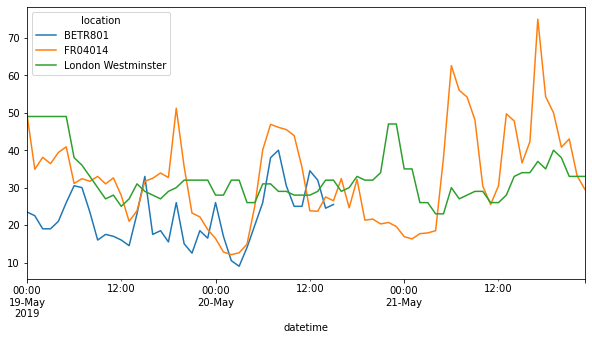

In [208]:
table['2019-05-19': '2019-05-21'].plot(figsize = (10,5));

__Rolling Averages__

[Rolling Averages with Pandas](https://datagy.io/rolling-average-pandas/)

__Your Turn__

Apply rolling average to one of the columns of the dataset.

In [121]:
print(air_quality.value[1:6].mean())
air_quality.rolling(5)['value'].mean()[4:12]

air_quality.ffill()

23.979999999999997


,city,country,datetime,location,parameter,value,unit,day_name,month_day,day_of_month
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³,Friday,June,21
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³,Thursday,June,20
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³,Thursday,June,20
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³,Thursday,June,20
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³,Thursday,June,20
...,...,...,...,...,...,...,...,...,...,...
2063,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,Tuesday,May,7
2064,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,Tuesday,May,7
2065,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,Tuesday,May,7
2066,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,Tuesday,May,7


## Resampling 

In [137]:
daily_mean = table.resample('D').median()

new_air_quality = air_quality.set_index('datetime')

new_air_quality.resample('M').max()

,city,country,location,parameter,value,unit,day_name,month_day,day_of_month
datetime,,,,,,,,,
2019-05-31 00:00:00+00:00,Paris,GB,London Westminster,no2,97.0,µg/m³,Wednesday,May,31
2019-06-30 00:00:00+00:00,Paris,GB,London Westminster,no2,84.7,µg/m³,Wednesday,June,21


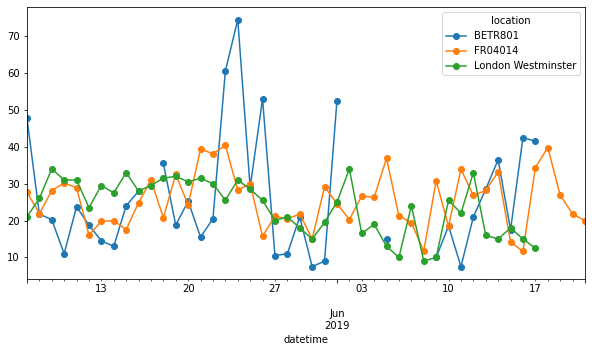

In [138]:
daily_mean.plot(style = '-o', figsize = (10,5));

__Your Turn__ 

- Work on the `emails` dataset together with your group. This dataset records how many times a user opened emails from a company for a given week.

__Questions__

- In the first week of 2015 July how many unique users opened their emails?

- What is the total emailed opened in the same time period?

- What are the first and last dates for user 998 recorded in this dataset.

- Is this user opened at least once email every week?

- Is there any such user?

- For each month, plot the total amount of opened emails.

In [141]:
data_url = 'https://raw.githubusercontent.com/PracticalTimeSeriesAnalysis/BookRepo/master/Ch02/data/emails.csv'
emails = pd.read_csv(data_url)



# Resources

[Pandas Documentation - How to Handle Time Series](https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html)

[Time Series Analysis - Jordan Kern](https://www.youtube.com/watch?v=Prpu_U5tKkE&ab_channel=JordanKern)

[Aileen Nielsen - Scipy 2016](https://www.youtube.com/watch?v=JNfxr4BQrLk&list=PLRRxOfxVBikdM1SbWQlCd8ENfN8ZuJ_js&ab_channel=Enthought)

[Aileen Nielsen - Github - Tutorial Notebooks](https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython)

[Practical Time Series Analysis by Aileen Nielsen](https://www.amazon.com/Practical-Time-Analysis-Prediction-Statistics/dp/1492041653/ref=pd_sbs_14_1/139-1658070-3066815?_encoding=UTF8&pd_rd_i=1492041653&pd_rd_r=18516b44-96e8-472c-a7c2-f2a9e75c3f3e&pd_rd_w=mlVmW&pd_rd_wg=p4oW8&pf_rd_p=ed1e2146-ecfe-435e-b3b5-d79fa072fd58&pf_rd_r=NV6ZPS2R6TN36RJXMXZG&psc=1&refRID=NV6ZPS2R6TN36RJXMXZG)